In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rulerwd
from tqdm import tqdm 

import scipy.odr as odr
def linear_f(b, x):
    '''
    x: r or log(r)
    '''
    return b[0]*x + b[1]
    
def fit(x, y, sx, sy):
    model = odr.Model(linear_f)
    beta0 = [1., 2.]
    mydata = odr.RealData(x, y, sx=sx, sy=sy)
    myodr = odr.ODR(mydata, model, beta0=beta0)
    myoutput = myodr.run()
    # Calculate the sigma and scatter. 
    sigma = (sy**2 + (myoutput.beta[0]*sx)**2)**0.5
    weight = 1 / sigma
    V1 = np.sum(weight)
    V2 = np.sum(weight**2)
    # std_res = (np.sum(weight*(np.polyval(myoutput.beta, x)-y)**2) / np.sum(weight)  * len(x) / (len(x)-2))**0.5
    std_res = (np.sum(weight*(np.polyval(myoutput.beta, x)-y)**2) / (V1 - 2*V2/V1) * V1**2 / V2)**0.5  
    return [myoutput.beta, len(x), std_res, np.sum(weight*(np.polyval(myoutput.beta, x)-y)**2), (V1 - 2*V2/V1),  V1**2 / V2]

Module "telfit" is not installed, module "telfit_wrapper" cannot be used. Don't try it :-)


In [2]:
coeff = [10, 2]

sigma_r = 0.00
measure_err =  1

N_array = np.arange(5, 51, 1)
balance_1_list = []
balance_2_list = []
res_1_list = []
res_2_list = []

for N in tqdm(N_array):
    balance_1_N = []
    balance_2_N = []
    res_1_N = []
    res_2_N = []
    measure_err_2 = np.random.rand(N) * 0.5 - 0.25 + measure_err
    measure_err_2[measure_err_2 <= 0] = 0.01
    for _ in range(500):
        T = np.random.random(N)
        rho_1 = np.polyval(coeff, T) + np.random.randn(N) * measure_err + np.random.randn(N) * sigma_r
        rho_2 = np.polyval(coeff, T) + np.random.randn(N) * measure_err_2 + np.random.randn(N) * sigma_r
        res = fit(T, rho_1, np.array([0.01]*N), np.array([measure_err]*N))
        res_2 = fit(T, rho_2, np.array([0.01]*N), measure_err_2)

        balance_1 = res[2]**2 - N * measure_err**2 - N * sigma_r**2
        balance_2 = res_2[2]**2 - np.sum(measure_err_2**2) - N * sigma_r**2
        balance_1_N.append(balance_1)
        balance_2_N.append(balance_2)
        res_1_N.append(res[2:])
        res_2_N.append(res_2[2:])
   
    balance_1_list.append(np.mean(balance_1_N))
    balance_2_list.append(np.mean(balance_2_N))
    res_1_list.append(np.mean(res_1_N, axis=0))
    res_2_list.append(np.mean(res_2_N, axis=0))
res_1_list = np.array(res_1_list)
res_2_list = np.array(res_2_list)

100%|██████████| 46/46 [00:12<00:00,  3.76it/s]


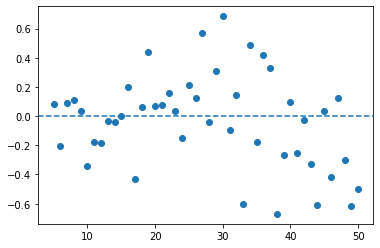

In [4]:
plt.scatter(N_array, balance_1_list)
# plt.scatter(N_array, np.array(balance_2_list))
# plt.scatter(N_array, -0.06*res_2_list[:,-1])
plt.axhline(0, ls='--', zorder=0)

## Varify Chen-li's explanation

In [18]:
coeff = [10., 2.]
measure_err = 0.5
N = 100

x = np.random.rand(N)
y = np.polyval(coeff, x) + np.random.randn(N) * measure_err

fit_res = np.polyfit(x, y, 1)
y_hat = np.polyval(fit_res, x)
# sigma = np.sum()

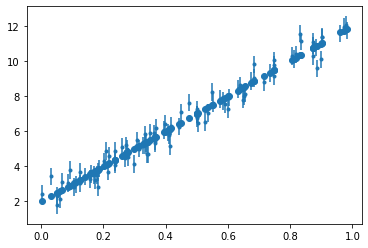

In [19]:
plt.errorbar(x, y, yerr=[measure_err]*N, fmt='.')

<ErrorbarContainer object of 3 artists>

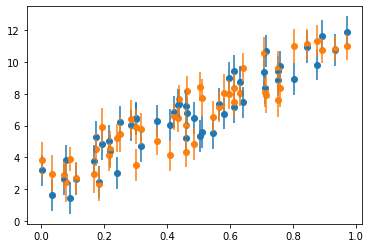

In [62]:
plt.scatter(T, rho_1)
plt.errorbar(T, rho_1, yerr=np.array([measure_err]*N), fmt='.')
plt.scatter(T, rho_2)
plt.errorbar(T, rho_2, yerr=measure_err_2, fmt='.')

In [189]:
N = 50
coeff = [10, 2]
sigma_r = 0
balance_1_N = []
balance_2_N = []
res_list = []
res_2_list = []
for _ in range(1000):
    T = np.random.random(N)
    measure_err =  1
    measure_err_2 = np.random.rand(N) * 1 - 0.5 + measure_err
    measure_err_2[measure_err_2 <= 0] = 0.01
    rho_1 = np.polyval(coeff, T) + np.random.randn(N) * measure_err + np.random.randn(N) * sigma_r
    rho_2 = np.polyval(coeff, T) + np.random.randn(N) * measure_err_2 + np.random.randn(N) * sigma_r
    res = fit(T, rho_1, np.array([0.01]*N), np.array([measure_err]*N))
    sigma = res[2]

    res_2 = fit(T, rho_2, np.array([0.01]*N), measure_err_2)

    balance_1 = N * res[-1]**2 - N * measure_err**2 
    balance_2 = res_2[2]**2 - np.sum(measure_err_2**2)
    balance_1_N.append(balance_1)
    balance_2_N.append(balance_2)
    res_list.append(res[2:])
    res_2_list.append(res_2[2:])
res_list = np.array(res_list)
res_2_list = np.array(res_2_list)

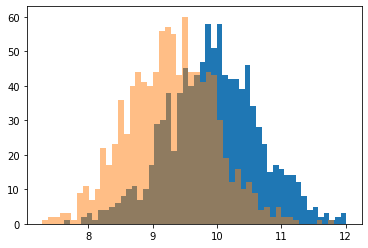

In [116]:
plt.hist(res_list[:,0], bins=50);
plt.hist(res_2_list[:,0], bins=50, alpha=0.5);

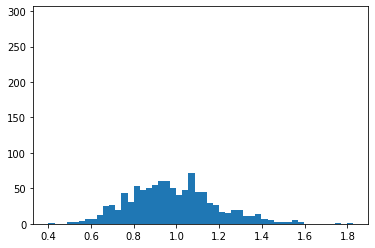

In [193]:
plt.hist(res_list[:,-1], bins=50);
plt.hist(res_list[:,2] / 92, bins=50);


In [174]:
np.mean(balance_1_N)

1.9855190883458926

In [10]:
coeff = [10, 2]

sigma_r = 0.00
measure_err =  1

N_array = np.arange(5, 50, 1)
balance_1_list = []
balance_2_list = []

for N in tqdm(N_array):
    balance_1_N = []
    balance_2_N = []
    for _ in range(500):
        T = np.random.random(N)
        rho_1 = np.polyval(coeff, T) + np.random.randn(N) * measure_err + np.random.randn(N) * sigma_r
        res = np.polyfit(T, rho_1, 1)
        sigma = (np.sum((rho_1-(res[0]*T+res[1]))**2)/(N-2))**0.5        

        balance_1 = N * sigma**2 - N * measure_err**2 - N * sigma_r**2
        balance_1_N.append(balance_1)
        # balance_2_N.append(balance_2)
   
    balance_1_list.append(np.mean(balance_1_N))
    # balance_2_list.append(np.mean(balance_2_N))

100%|██████████| 45/45 [00:02<00:00, 17.78it/s]


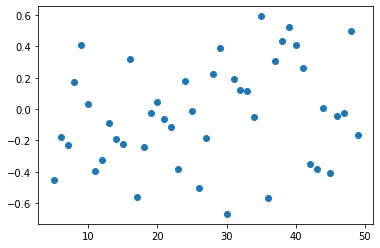

In [11]:
plt.scatter(N_array, balance_1_list)

In [64]:
np.mean(temp)

-0.0071477913216799575

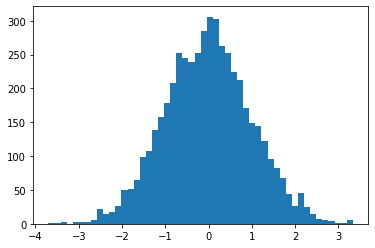

In [37]:
N = 5000
measure_err = np.random.randn(N) * 1 + 1
sample = np.random.randn(N) * measure_err + np.random.randn(N) * 0.00
plt.hist(sample/measure_err, bins=50);

In [36]:
weight = 1 / measure_err**2
V1 = np.sum(weight)
V2 = np.sum(weight**2)
np.sum(sample**2) / N
# print(np.sum((sample - 0)**2) / N)
# print(np.sum(weight * (sample - np.mean(sample))**2) / np.sum(weight))
# print(np.mean(measure_err))

1.2450394121179995

In [232]:
delta_all = []
N_array = range(5, 50, 1)
measure_err = 0.5
e_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.5]
diff_list = []
for measure_err in tqdm(e_list):
    for N in N_array:
        delta = []
        for _ in range(10000):
            
            sample = np.random.randn(N) * measure_err
            delta.append(np.sum((sample-np.mean(sample))**2) *N/(N-1)- N * measure_err**2)
        delta_all.append(np.mean(delta))
    diff_list.append(np.mean(delta_all))
    
# plt.scatter(N_array, delta_all)
# # plt.ylim(-0.5, 0)
# plt.title('Mean: {:.3f}'.format(np.mean(delta_all)))
# plt.xlabel('Sample size (N)'); plt.ylabel('res - $Ne^2$')
# plt.savefig('../img/post-residual_of_fitting/residual_diff.png', dpi=200)


100%|██████████| 10/10 [01:12<00:00,  7.27s/it]


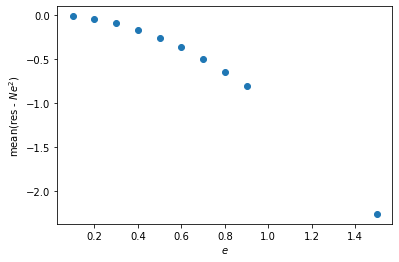

In [227]:
plt.scatter(e_list, [-0.01, -0.039, -0.09, -0.163, -0.253, -0.358, -0.499, -0.642, -0.8, -2.256])
plt.xlabel('$e$'); plt.ylabel('mean(res - $Ne^2$)')
plt.savefig('../img/post-residual_of_fitting/residual_diff_e.png', dpi=200)




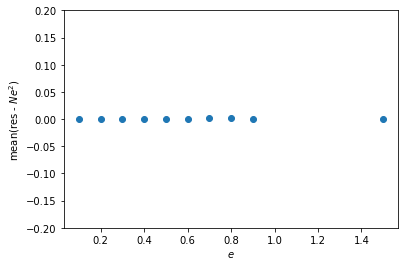

In [237]:
plt.scatter(e_list, diff_list)
plt.xlabel('$e$'); plt.ylabel('mean(res - $Ne^2$)')
plt.ylim(-0.2, 0.2)
# plt.tight_layout()
plt.savefig('../img/post-residual_of_fitting/residual_diff_e_corrected.png', dpi=200)

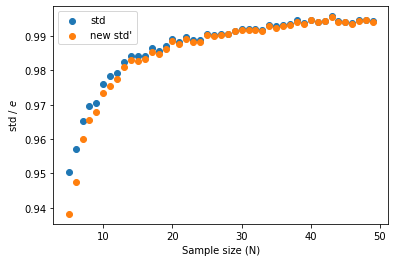

In [217]:
delta_all = []
delta_mean_all = []
N_array = range(5, 50, 1)
measure_err = 0.5
for N in N_array:
    delta = []
    delta_mean = []
    for _ in range(50000):
        sample = np.random.randn(N) * measure_err
        delta.append((np.sum((sample - 0)**2)/(N))**0.5 / measure_err)
        delta_mean.append((np.sum((sample - np.mean(sample))**2)/(N-1))**0.5 / measure_err)
    delta_all.append(np.mean(delta))
    delta_mean_all.append(np.mean(delta_mean))
    
plt.scatter(N_array, delta_all, label='std')
plt.scatter(N_array, delta_mean_all, label="new std'")

plt.legend()
plt.xlabel('Sample size (N)'); plt.ylabel('std / $e$')
plt.savefig('../img/post-residual_of_fitting/std_ratio_new.png', dpi=200)

# Question

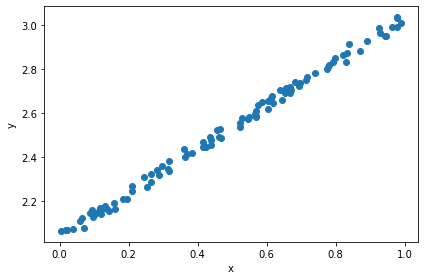

In [17]:
coeff = [1, 2]
measure_err = 0.05
sigma_r = 0.03
N = 100
rand_list = []
for i in range(3):
    np.random.seed(i)
    rand_list.append(np.random.rand(N))
x = rand_list[0]
y = np.polyval(coeff, x) + rand_list[1] * measure_err + rand_list[2] * sigma_r

plt.scatter(x, y)
plt.xlabel('x'); plt.ylabel('y'); 
plt.tight_layout()
plt.savefig('../img/post-residual_of_fitting/q_relation.png', dpi=200)